# Desafío de IA Aplicada: Creación de un Sistema de Diagnóstico para la medicina de precisión.

# **Fase 1: Gestión y Análisis Exploratorio de Datos (EDA)**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ckd_full.csv to ckd_full.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para ver todas las columnas
pd.set_option('display.max_columns', None)

# Carga del dataset
# Asegúrate de que el archivo se llame 'ckd_full.csv' como pide el reto
try:
    df = pd.read_csv('ckd_full.csv')
    print("✅ Dataset 'ckd_full.csv' cargado exitosamente.")
    print(f"Dimensiones: {df.shape}") # Debería ser (400, 25) [cite: 24]
except FileNotFoundError:
    print("❌ Error: No se encuentra el archivo 'ckd_full.csv'. Asegúrate de subirlo.")

# Vista preliminar
df.head()

✅ Dataset 'ckd_full.csv' cargado exitosamente.
Dimensiones: (400, 25)


,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
print("--- 1. RESUMEN DE INFORMACIÓN Y TIPOS DE DATOS ---")
# Esto nos ayuda a ver si columnas numéricas se cargaron como 'object' (texto)
df.info()

print("\n--- 2. CONTEO DE VALORES NULOS POR COLUMNA ---")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

print("\n--- 3. AUDITORÍA DE VALORES INCONSISTENTES (Columnas 'object') ---")
# Iteramos solo sobre columnas tipo 'object' para buscar errores de tipeo como '\tno'
cols_object = df.select_dtypes(include=['object']).columns

for col in cols_object:
    print(f"\nColumna: {col}")
    print(f"Valores únicos: {df[col].unique()}")
    # Al ejecutar esto, busca visualmente:
    # - '\tno', '\tyes', ' yes', espacios vacíos
    # - '?' que suelen usarse como nulos en este dataset

--- 1. RESUMEN DE INFORMACIÓN Y TIPOS DE DATOS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 

--- Auditoría de Rangos Lógicos ---
Registros con edad ilógica (<0 o >100): 0
Registros con presión arterial fuera de rango común: 0

--- Visualización de Distribuciones y Outliers ---


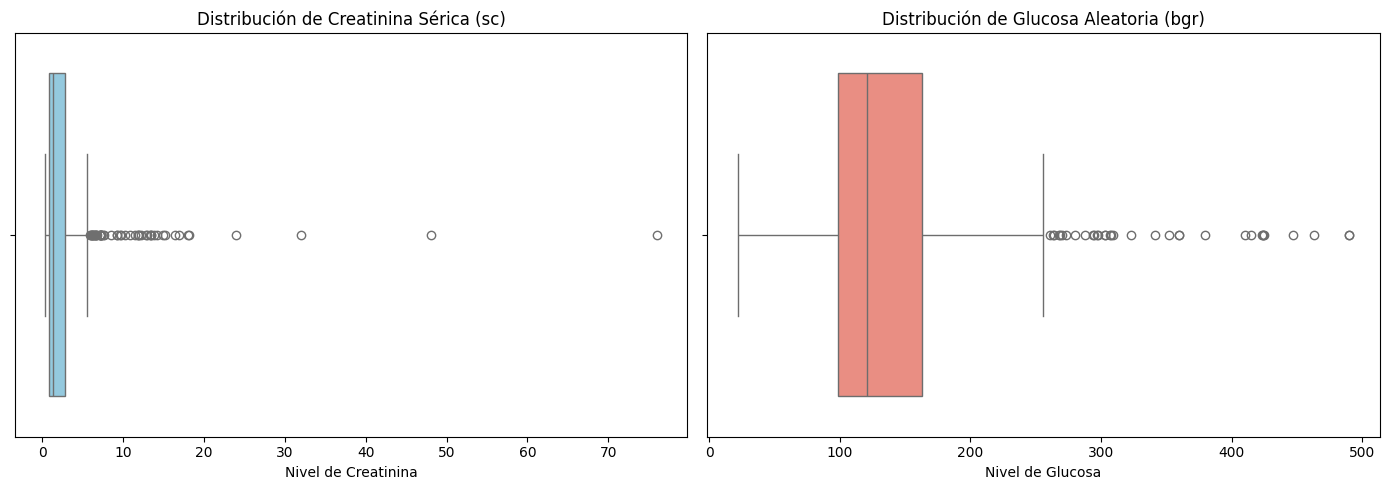

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- PREPARACIÓN PREVIA: Estandarizar nombres ---
# (Hacemos esto primero para trabajar con nombres de variables cómodos)
column_mapping = {
    'Age': 'age', 'Blood Pressure': 'bp', 'Specific Gravity': 'sg', 'Albumin': 'al',
    'Sugar': 'su', 'Red Blood Cells': 'rbc', 'Pus Cell': 'pc', 'Pus Cell clumps': 'pcc',
    'Bacteria': 'ba', 'Blood Glucose Random': 'bgr', 'Blood Urea': 'bu',
    'Serum Creatinine': 'sc', 'Sodium': 'sod', 'Potassium': 'pot', 'Hemoglobin': 'hemo',
    'Packed Cell Volume': 'pcv', 'White Blood Cell Count': 'wc',
    'Red Blood Cell Count': 'rc', 'Hypertension': 'htn', 'Diabetes Mellitus': 'dm',
    'Coronary Artery Disease': 'cad', 'Appetite': 'appet', 'Pedal Edema': 'pe',
    'Anemia': 'ane', 'Class': 'class'
}
# Solo renombra si las columnas originales existen
df.rename(columns=column_mapping, inplace=True)

# --- A. RESTRICCIONES LÓGICAS (Constraints) ---
print("--- Auditoría de Rangos Lógicos ---")

# 1. Verificar Edad (0-100) [cite: 30]
invalid_ages = df[(df['age'] < 0) | (df['age'] > 100)]
print(f"Registros con edad ilógica (<0 o >100): {len(invalid_ages)}")

# 2. Verificar Presión Arterial (Rango médico razonable, ej: 40-180) [cite: 31]
# Nota: Valores nulos no se cuentan aquí
invalid_bp = df[(df['bp'] < 40) | (df['bp'] > 180)]
print(f"Registros con presión arterial fuera de rango común: {len(invalid_bp)}")

# --- B. VISUALIZACIÓN DE ANOMALÍAS (Outliers) ---
# El reto pide visualizar características clave como Serum Creatinine y Glucose [cite: 32]
print("\n--- Visualización de Distribuciones y Outliers ---")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma + Boxplot para Serum Creatinine (sc)
sns.boxplot(x=df['sc'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Creatinina Sérica (sc)')
axes[0].set_xlabel('Nivel de Creatinina')

# Histograma + Boxplot para Blood Glucose Random (bgr)
sns.boxplot(x=df['bgr'], ax=axes[1], color='salmon')
axes[1].set_title('Distribución de Glucosa Aleatoria (bgr)')
axes[1].set_xlabel('Nivel de Glucosa')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
import numpy as np

# --- A. FUNCIONES DE LIMPIEZA DE CALIDAD DE PRODUCCIÓN --- [cite: 34]

def clean_text_errors(df_in):
    """Limpia caracteres ocultos y estandariza textos."""
    df_out = df_in.copy()
    cols_obj = df_out.select_dtypes(include=['object']).columns

    for col in cols_obj:
        # Reemplaza '?' por NaN real
        df_out[col] = df_out[col].replace('?', np.nan)
        # Elimina tabulaciones (\t) y espacios extra al inicio/final
        df_out[col] = df_out[col].str.replace('\t', '', regex=False).str.strip()

    return df_out

def fix_numeric_types(df_in):
    """Fuerza la conversión de columnas numéricas que parecen texto."""
    df_out = df_in.copy()
    # Columnas que sabemos que dieron problemas en el paso 1.1
    cols_to_fix = ['pcv', 'wc', 'rc']

    for col in cols_to_fix:
        if col in df_out.columns:
            df_out[col] = pd.to_numeric(df_out[col], errors='coerce')

    return df_out

# Ejecutamos la limpieza
df_clean = clean_text_errors(df)
df_clean = fix_numeric_types(df_clean)

# Mapeamos la clase objetivo a números (1 = Enfermo/ckd, 0 = Sano/notckd)
df_clean['class'] = df_clean['class'].map({'ckd': 1, 'notckd': 0})

# --- B. ESTRATEGIA DE IMPUTACIÓN --- [cite: 35]

# Separamos columnas numéricas y categóricas
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

print("Iniciando imputación...")

# 1. Imputación Numérica: KNN (K-Nearest Neighbors)
# Justificación: Usamos KNN porque maneja patrones complejos mejor que la media simple.
# Si un paciente tiene la hemoglobina baja, es probable que tenga otros valores similares
# a otros pacientes anémicos, no al "promedio" general.
knn_imputer = KNNImputer(n_neighbors=5)
df_clean[numeric_cols] = knn_imputer.fit_transform(df_clean[numeric_cols])

# 2. Imputación Categórica: Moda (Most Frequent)
# Justificación: Para sí/no o normal/anormal, lo más seguro es usar la mayoría.
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[categorical_cols] = cat_imputer.fit_transform(df_clean[categorical_cols])

# Verificación final
nulls_left = df_clean.isnull().sum().sum()
print(f"Limpieza e imputación finalizadas. Nulos restantes: {nulls_left}")

# Guardamos el resultado para la Fase 2
df_clean.to_csv('ckd_cleaned.csv', index=False)
print("✅ Archivo 'ckd_cleaned.csv' guardado exitosamente.")

Iniciando imputación...
Limpieza e imputación finalizadas. Nulos restantes: 0
✅ Archivo 'ckd_cleaned.csv' guardado exitosamente.


# **Fase 2: Visualización de Insights**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")

# Cargar datos limpios
df = pd.read_csv('ckd_cleaned.csv')
print("✅ Datos cargados correctamente.")

✅ Datos cargados correctamente.


Conteo de casos:
class
1.0    250
0.0    150
Name: count, dtype: int64

Porcentajes:
class
1.0    62.5
0.0    37.5
Name: proportion, dtype: float64


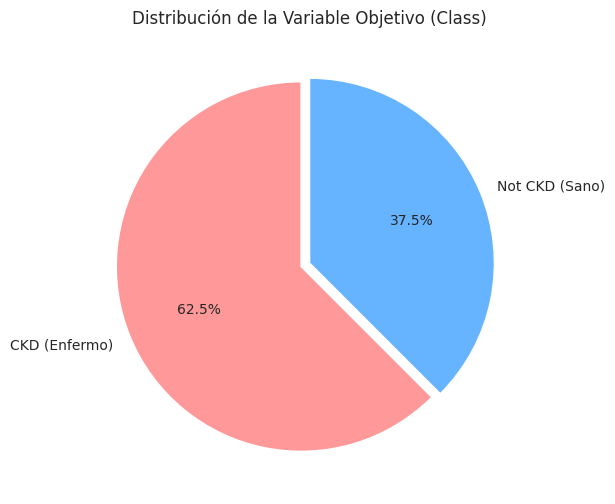

In [ ]:
# --- 2.1 Distribución de la Clase (CKD vs No CKD) ---
print("Conteo de casos:")
print(df['class'].value_counts())

print("\nPorcentajes:")
print(df['class'].value_counts(normalize=True) * 100)

# Gráfico Circular (Pie Chart)
plt.figure(figsize=(6, 6))
df['class'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['CKD (Enfermo)', 'Not CKD (Sano)'],
    colors=['#ff9999','#66b3ff'],
    startangle=90,
    explode=(0.05, 0) # Separa ligeramente la rebanada mayor
)
plt.title('Distribución de la Variable Objetivo (Class)')
plt.ylabel('') # Quitar etiqueta del eje Y para limpieza visual
plt.show()

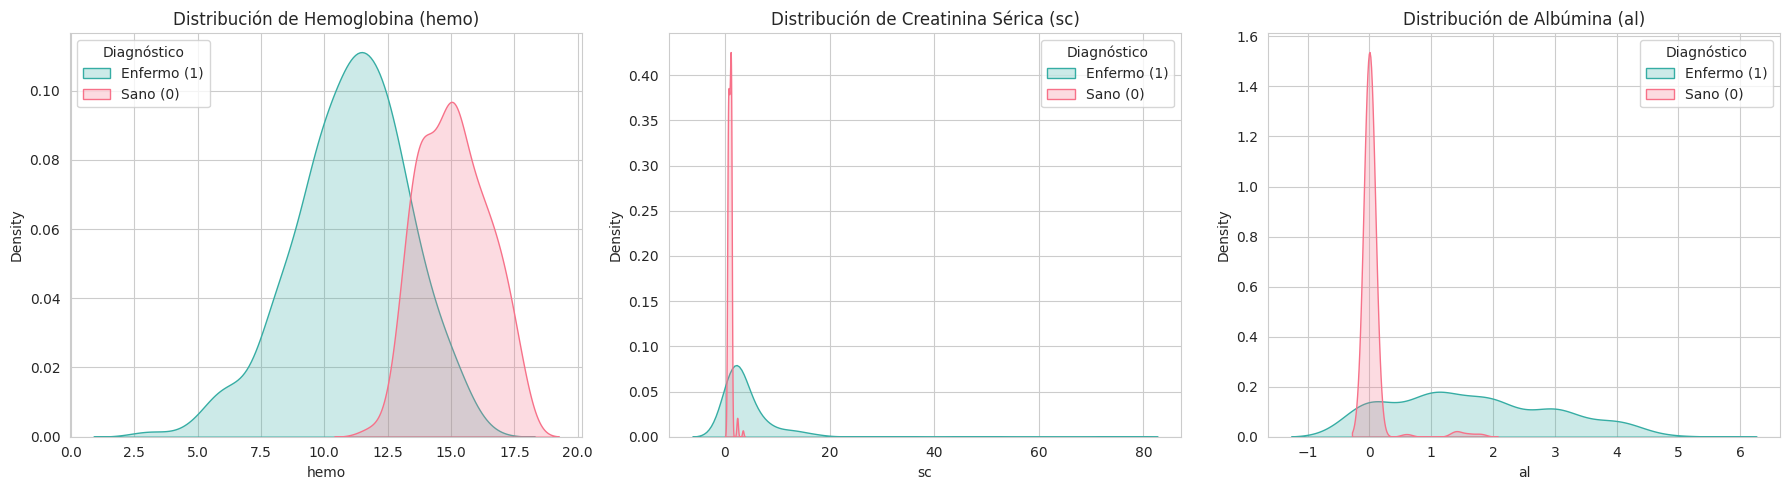

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2.2 Comparación de Biomarcadores Clave ---
# Definimos las variables numéricas médicas más importantes
features = ['hemo', 'sc', 'al']
titulos = ['Hemoglobina (hemo)', 'Creatinina Sérica (sc)', 'Albúmina (al)']
colors = ['#4CAF50', '#FF5722'] # Verde para Sano, Rojo para Enfermo (ajustable)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(features):
    # Usamos KDE (Kernel Density Estimate) para ver la forma de la distribución
    # fill=True rellena el área bajo la curva
    sns.kdeplot(data=df, x=col, hue='class', fill=True, ax=axes[i], palette='husl')

    axes[i].set_title(f'Distribución de {titulos[i]}')
    axes[i].set_xlabel(col)
    axes[i].legend(title='Diagnóstico', labels=['Enfermo (1)', 'Sano (0)'])

plt.tight_layout()
plt.show()

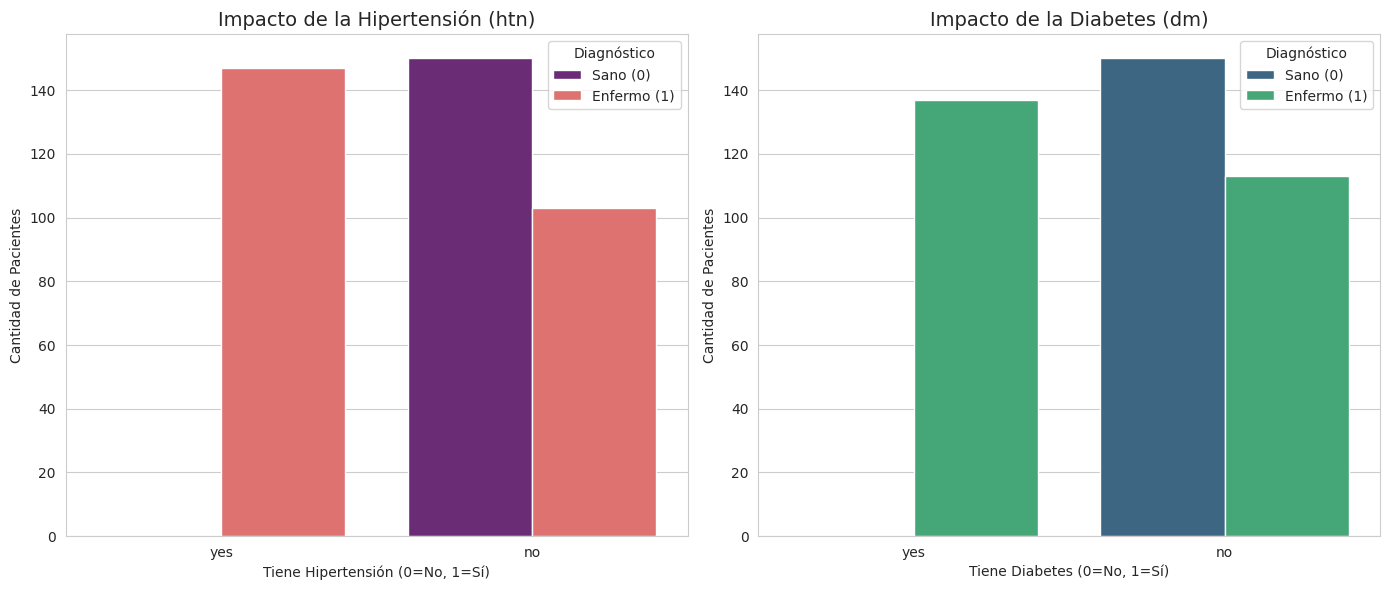

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2.3 Impacto de Comorbilidades (Hipertensión y Diabetes) ---

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Hipertensión (htn)
# 'yes' -> 1, 'no' -> 0 (Ya limpiamos los datos, así que deberían ser consistentes)
sns.countplot(data=df, x='htn', hue='class', ax=axes[0], palette='magma')
axes[0].set_title('Impacto de la Hipertensión (htn)', fontsize=14)
axes[0].set_xlabel('Tiene Hipertensión (0=No, 1=Sí)')
axes[0].set_ylabel('Cantidad de Pacientes')
axes[0].legend(title='Diagnóstico', labels=['Sano (0)', 'Enfermo (1)'])

# Gráfico 2: Diabetes Mellitus (dm)
sns.countplot(data=df, x='dm', hue='class', ax=axes[1], palette='viridis')
axes[1].set_title('Impacto de la Diabetes (dm)', fontsize=14)
axes[1].set_xlabel('Tiene Diabetes (0=No, 1=Sí)')
axes[1].set_ylabel('Cantidad de Pacientes')
axes[1].legend(title='Diagnóstico', labels=['Sano (0)', 'Enfermo (1)'])

plt.tight_layout()
plt.show()

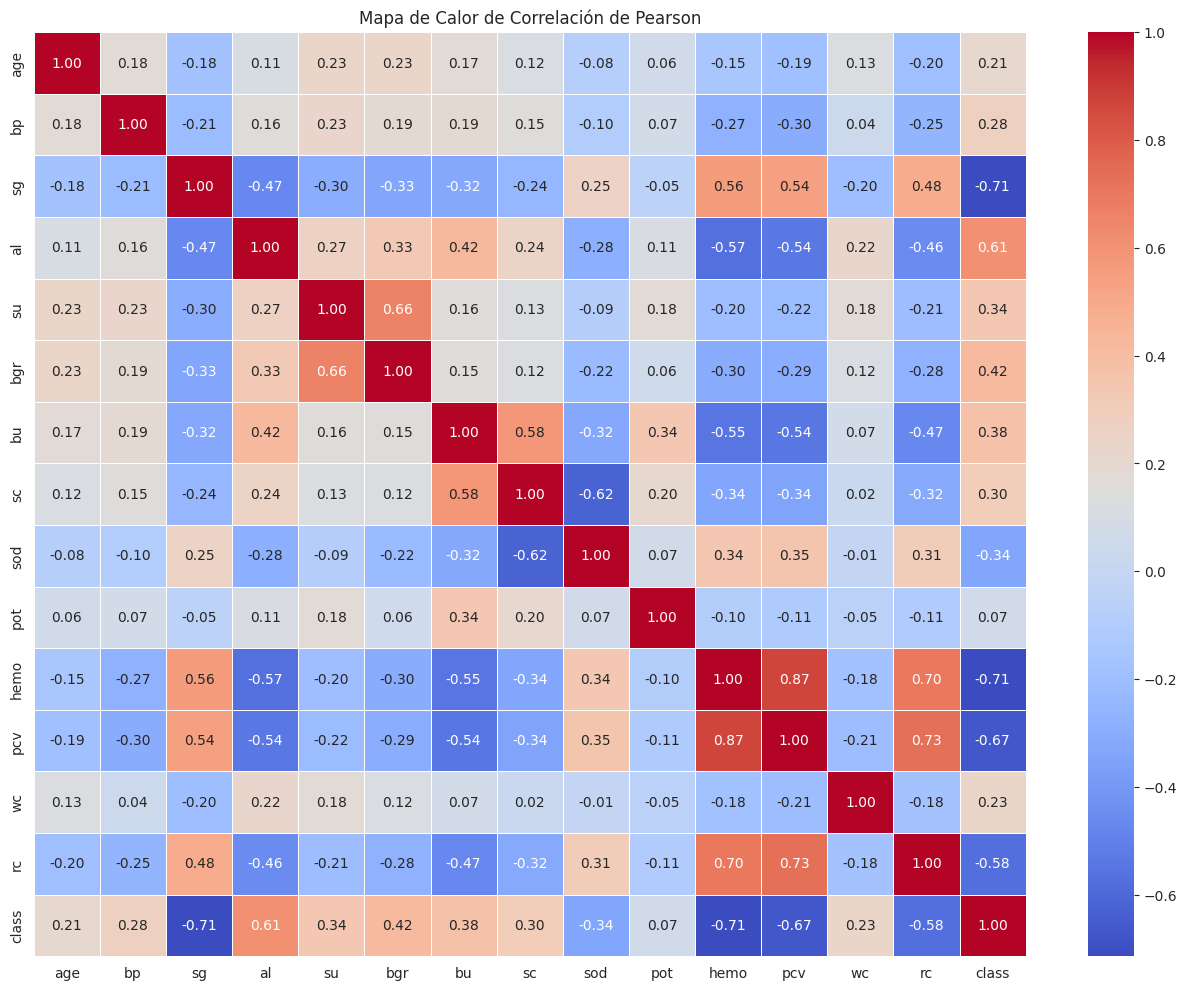


⚠️  ANÁLISIS DE REDUNDANCIA (Multicolinealidad > 0.85) [Requisito 4.2]:
------------------------------------------------------------
🔴 DETECTADO: 'hemo' y 'pcv' tienen correlación de 0.8669
------------------------------------------------------------
NOTA: Deberás eliminar una variable de cada par en la Fase 4.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2.4 Matriz de Correlación y Detección de Multicolinealidad ---

# 1. Seleccionamos solo las columnas numéricas
# (Las categóricas como 'htn' o 'dm' no entran en correlación de Pearson directamente)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 2. Calculamos la matriz de correlación
corr_matrix = numeric_df.corr()

# 3. Visualización (Heatmap)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Pearson')
plt.show()

# 4. Identificación automática de pares redundantes (> 0.85)
print("\n⚠️  ANÁLISIS DE REDUNDANCIA (Multicolinealidad > 0.85) [Requisito 4.2]:")
print("-" * 60)

high_corr_pairs = []
# Recorremos solo el triángulo superior para no repetir pares
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        val = corr_matrix.iloc[i, j]
        # Buscamos correlación fuerte positiva (>0.85) o negativa (<-0.85)
        if abs(val) > 0.85:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            print(f"🔴 DETECTADO: '{col1}' y '{col2}' tienen correlación de {val:.4f}")
            high_corr_pairs.append((col1, col2))

if not high_corr_pairs:
    print("✅ No se encontraron pares con correlación excesiva.")
else:
    print("-" * 60)
    print("NOTA: Deberás eliminar una variable de cada par en la Fase 4.")